# 短视频对消费者购买意愿的影响问卷数据分析报


为了深入了解短视频生活场景现状，次问卷调研的形式为短视频生活场景对消费者购买意愿研究提供数据支持。 

所有参与者都是自愿、匿名的。本问卷问卷分为个信息部分，短视频细节问题部分，与购买意愿表部分。

首先，我们输入我们需要用的python libraries，把excel data文件导入，取名为 S

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
survey = pd.read_excel('/Users/henryguo/Desktop/Temp1/video_data.xlsx')
# NOTE, when testing locally, please use the original file found under the file_path on your system
S = pd.DataFrame(survey)

发现excel data里除了Q5 （短视频公司名字）以外的所有columns 的cell里都是个位数。

我们parse Q5到Q5.1 - Q5.6以方便接下来的数据处理。

In [90]:
# Parsing Q5 company keys to different columns
S['Q5'] = S['Q5'].fillna('')
for company in range(1, 7):
    # Check if the string representation of the company number is in the comma-separated list in Q5
    S[f'Q5_{company}'] = S['Q5'].apply(lambda x: 1 if str(company) in x.split(',') else 0)
S_clean = S.drop(columns=['Q5'])
# Now every cell in our data display 1 number (the order of significance for each feature）

我们把所有问题的答案进行初步统计后得出一共有239 - 1 = 238 位参与者。

我们罗列出所有问题的平均和均方差 。

In [91]:
averages = S_clean.mean()
standard_deviations = S_clean.std()
stats_df = pd.DataFrame({
    'Question': averages.index,
    'Average': averages.values,
    'Standard Deviation': standard_deviations.values
})
print(stats_df)

   Question   Average  Standard Deviation
0        Q1  1.478992            0.500611
1        Q2  2.970588            1.267567
2        Q3  2.542017            1.313802
3        Q4  3.533613            1.339486
4        Q6  2.567227            1.280204
5        Q7  2.029412            0.858794
6        Q8  3.689076            1.639429
7      Q9.1  3.579832            1.249444
8      Q9.2  3.521008            1.228005
9      Q9.3  3.563025            1.202239
10     Q9.4  3.525210            1.210622
11    Q10.1  3.474790            1.265159
12    Q10.2  3.445378            1.250806
13    Q10.3  3.445378            1.247428
14    Q11.1  3.462185            1.149499
15    Q11.2  3.411765            1.231868
16    Q11.3  3.512605            1.262009
17    Q12.1  3.588235            1.179371
18    Q12.2  3.457983            1.213635
19    Q12.3  3.525210            1.224484
20     Q5_1  0.331933            0.471899
21     Q5_2  0.352941            0.478892
22     Q5_3  0.319328            0

以下为每道问题的矩形图，呈现出所有问题答案统计后的结果。

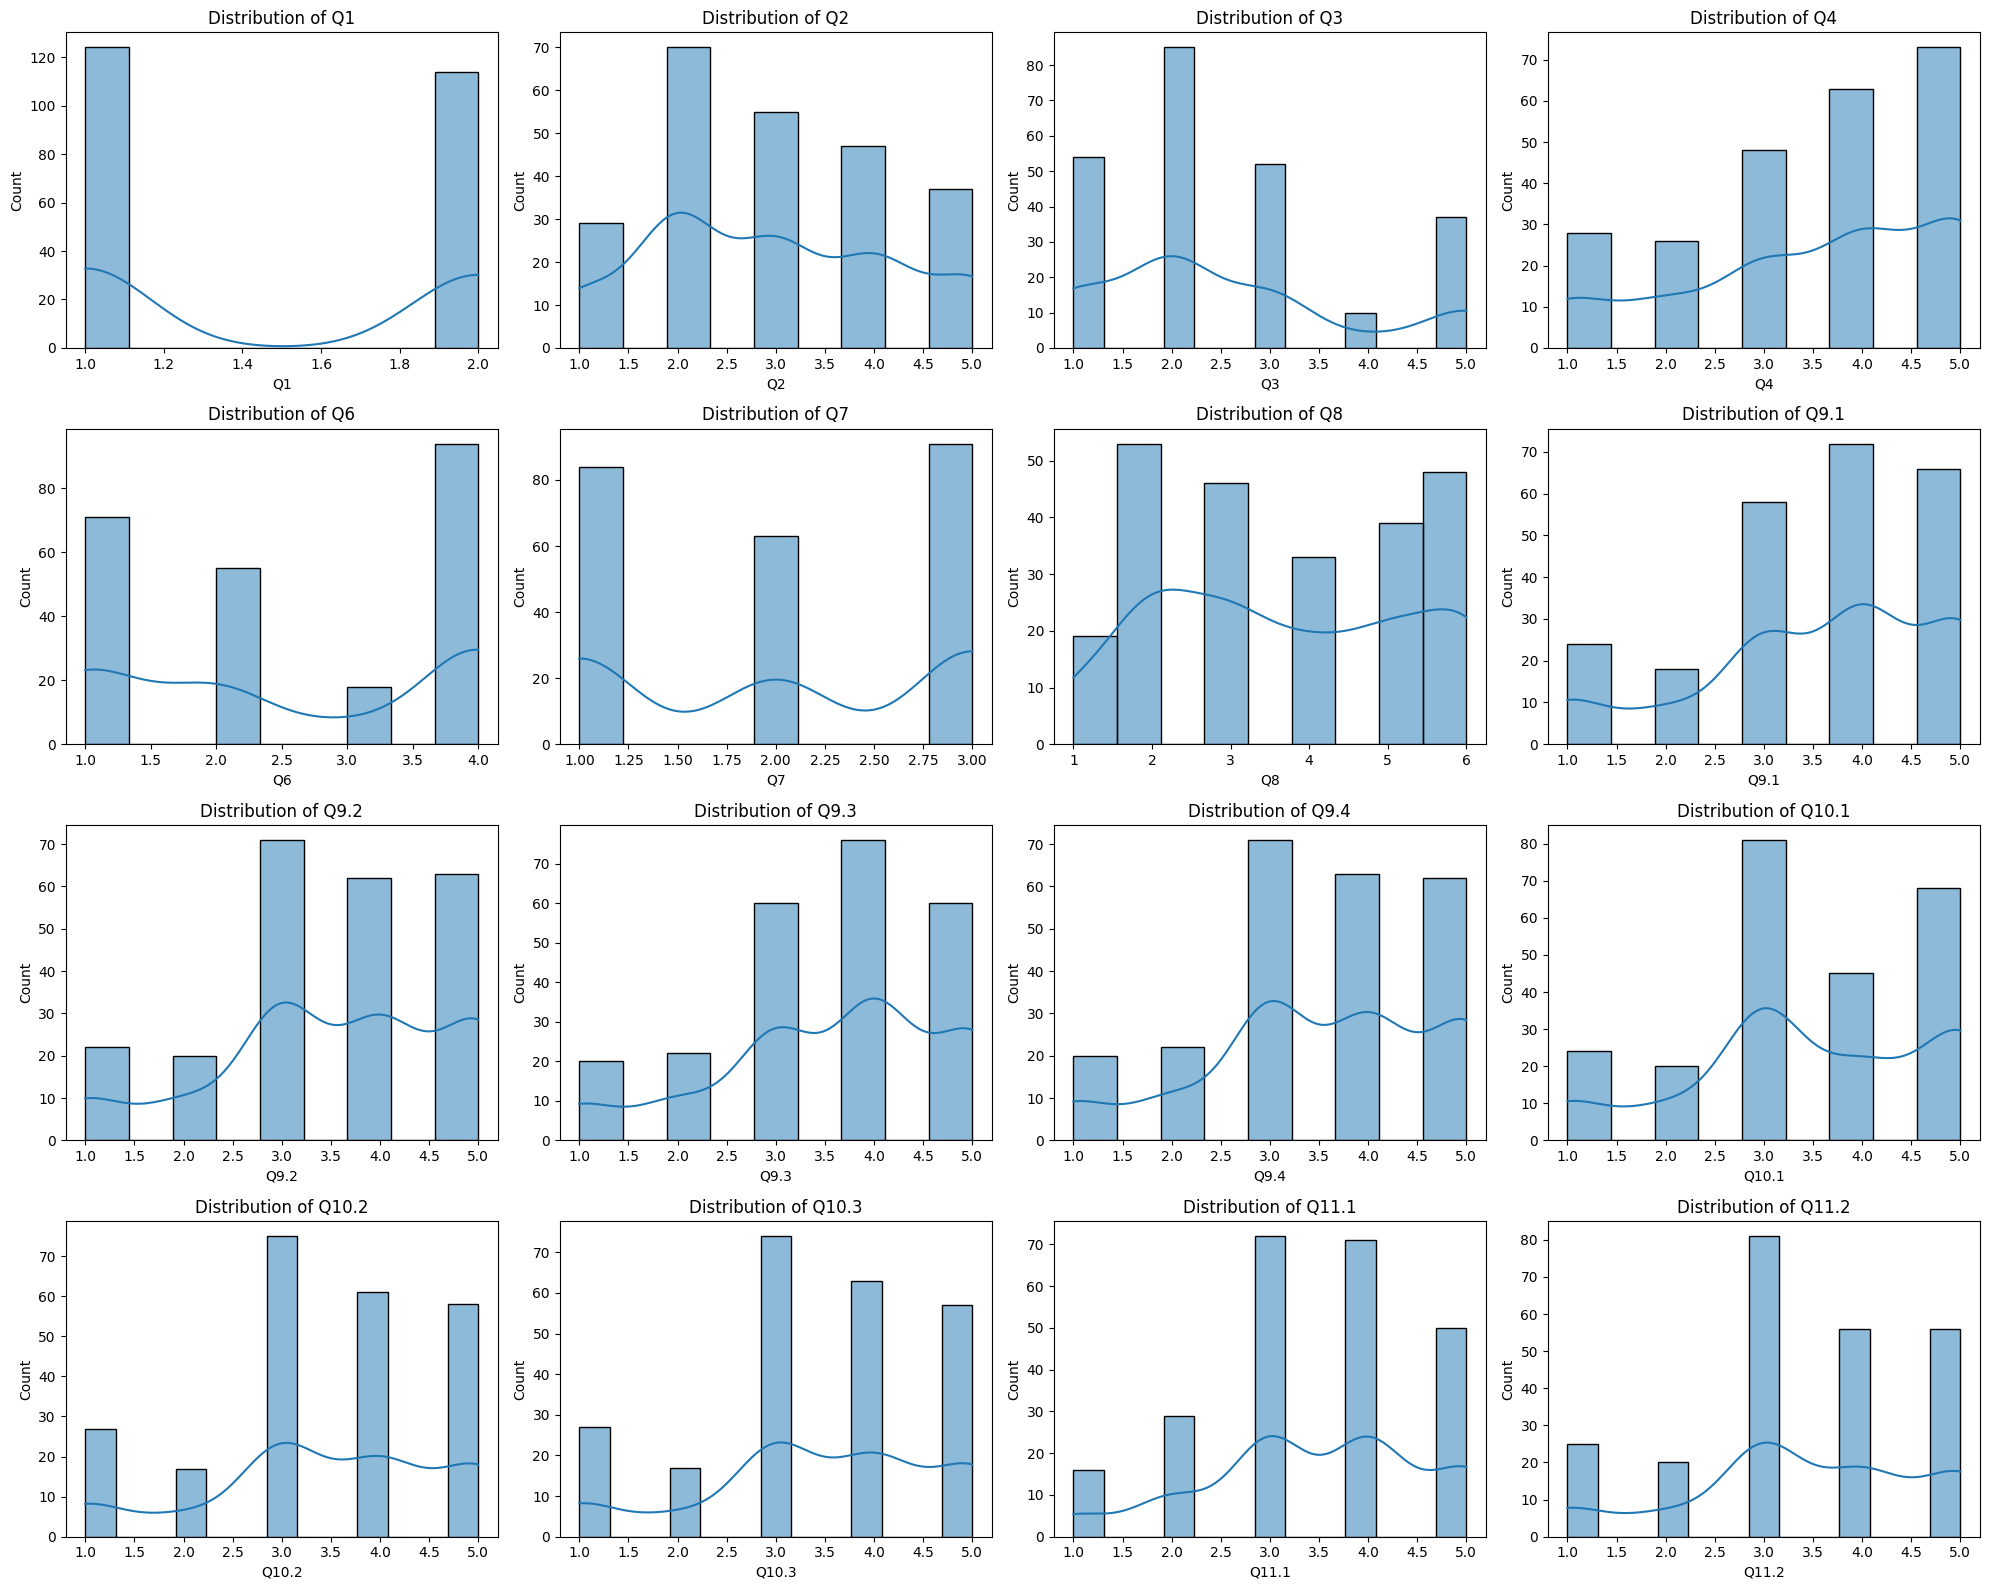

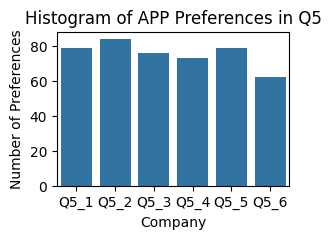

In [92]:
#Historgram for every feature
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
for i, col in enumerate(S_clean.columns[:16]):
    sns.histplot(data=S_clean, x=col, kde=True, ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

company_preferences = S_clean[[f'Q5_{i}' for i in range(1, 7)]].sum()
plt.figure(figsize=(3,2))
sns.barplot(x=company_preferences.index, y=company_preferences.values)
plt.title('Histogram of APP Preferences in Q5')
plt.xlabel('Company')
plt.ylabel('Number of Preferences')
plt.show()


对问卷进行Cronbach’s Alpha信度检验。如果此值高于0.8，则说明信度高；如果此值介于0.7~0.8之间，则说明信度较好；如果此值介于0.5~0.7，则说明信度可接受；如果此值小于0.5，说明信度不佳。

In [93]:
def cronbach_alpha(S_section):
    items_count = S_clean.shape[1]
    total_var = S_section.var().sum()
    total_items_var = S_section.sum(axis=1).var()
    
    alpha = (items_count / (items_count - 1)) * (1 - (total_var / total_items_var))
    return alpha
sections = {
    'Q1-4': S_clean[['Q1', 'Q2', 'Q3', 'Q4']],
    'Parsed Q5': S_clean[['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6']],
    'Q6-8': S_clean[['Q6', 'Q7', 'Q8']],
    'Q9.1-9.4': S_clean[['Q9.1', 'Q9.2', 'Q9.3', 'Q9.4']],
    'Q10.1-10.3': S_clean[['Q10.1', 'Q10.2', 'Q10.3']],
    'Q11.1-11.3': S_clean[['Q11.1', 'Q11.2', 'Q11.3']],
}
alpha_results = []
for name, section_df in sections.items():
    alpha = cronbach_alpha(section_df)
    items_count = section_df.shape[1]  # Number of columns in the section
    alpha_results.append({
        'Section': name,
        'Items Count': items_count,
        'Cronbach Alpha': alpha
    })
results_df = pd.DataFrame(alpha_results)
print(results_df)

      Section  Items Count  Cronbach Alpha
0        Q1-4            4        0.548599
1   Parsed Q5            6       -0.978050
2        Q6-8            3       -0.008420
3    Q9.1-9.4            4        0.671552
4  Q10.1-10.3            3        0.577706
5  Q11.1-11.3            3        0.563113


各维度的Cronbach’s α系数如下：个人信息因素的Cronbach’s α系数为0.549，软件选择的Cronbach’s α系数为-0.978，短视频时间的Cronbach’s α系数为-0.008，精准匹配性因素的Cronbach’s α系数为0.672，感知价值因素的Cronbach’s α系数为0.577，功能价值因素的Cronbach’s α系数为0.563。
问卷中Q5与Q6-8信度不佳，说明数据信度质量高。别的问题的Cronbach Alpha值都大于0.5，可用于进一步分析。

对量表的效度分析采用KMO和Bartlett球检验法进行检验。如果此值高于0.8，则说明研究数据非常适合提取信息，效度很好；如果此值介于0.7~0.8之间，则说明研究数据适合提取信息，效度较好；如果此值介于0.6~0.7，则说明研究数据比较适合提取信息，效度一般；如果此值小于0.6，说明数据效度一般。
对量表的效度分析采用KMO和Bartlett球检验法进行检验。

In [94]:
kmo_all, kmo_model = calculate_kmo(S[['Q9.1','Q9.2','Q9.3','Q9.4','Q10.1','Q10.2','Q10.3','Q11.1','Q11.2','Q11.3']])
chi_square_value, p_value = calculate_bartlett_sphericity(S[['Q9.1','Q9.2','Q9.3','Q9.4','Q10.1','Q10.2','Q10.3','Q11.1','Q11.2','Q11.3']])
print(f"KMO: {kmo_model}")
print(f"Bartlett's test chi-square value: {chi_square_value}, p-value: {p_value}")

KMO: 0.8770867633936759
Bartlett's test chi-square value: 1112.561178650933, p-value: 1.1863873670079863e-203


我们发现KMO为0.877， 大于0.6，Bartlett的球形度检验中p<0.001，说明变量间存在相关因子，适合做因子分析。

对数据初步统计后，我们计算每道题与Q12.1，Q12.2，Q12.3 (购买意愿）的相关性。相关性 = -1时成反比，相关性=0时没有可比性，相关性 = 1 时成正比。

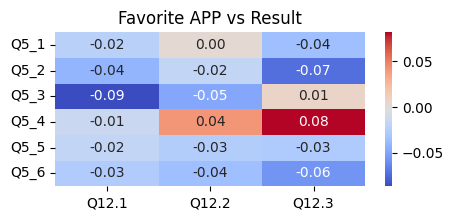

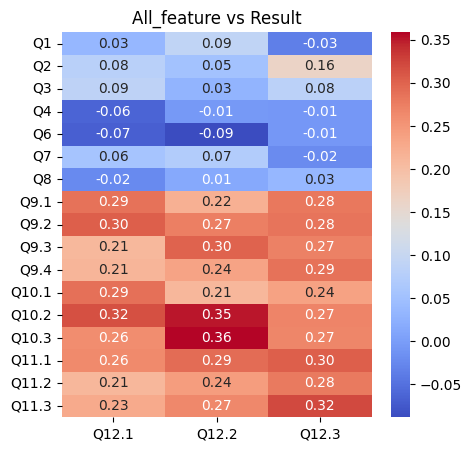

In [95]:
correlation_matrix = S_clean.corr(method='spearman')
plt.figure(figsize=(5,2))
sns.heatmap(correlation_matrix.loc['Q5_1':'Q5_6', 'Q12.1':'Q12.3'], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Favorite APP vs Result')
plt.show()

correlation_results = correlation_matrix.loc['Q1':'Q11.3', 'Q12.1':'Q12.3']
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_results, annot= True, cmap='coolwarm', fmt=".2f")
plt.title('All_feature vs Result')
plt.show()



Q1到Q4为参与者本人信息，与结果购买意愿几乎没关系，在意料之中。但是Q2与Q12.3的关联为0.16，远远大于其他个人信息与结果的关系。

Q5为最长用视频软件，与结果没关系。

Q6到Q8询问用短视频时间类问题，数据表明与结果没有关联，出乎意料。

Q9.1到Q11.3的问题与结果Q12.1-3的关联全部徘徊于0.2与0.4之间，展现出轻度正项关联。


了解问题与结论的关联之后，我们可以在对未来针对短视频与购买意愿关系的问卷设计中，省略相关性低的因素，并增加或具体化相关性大的因素。这不但能使问卷精简，使用户对参与问卷调查更有兴趣，增加数据量，还能让我们筛选出对购买意愿影响最大的短视频因素。